In [16]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../modules'))
from statistical_methods import StatisticalMethods
from best_pipelines import models_to_cv
import matplotlib.colors as mcolors
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Sem ADASYN

In [2]:
best_pipelines, ensembles = models_to_cv()

metrics = {}
for model in best_pipelines.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_cv.csv')

In [3]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['ACSA', 'recall', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [4]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,ACSA,0.962301,0.005026,"0.9592, 0.9654"
1,KNN,recall,0.972244,0.006639,"0.9681, 0.9764"
2,KNN,f1_score,0.966959,0.004539,"0.9641, 0.9698"
3,KNN,training_time,0.166842,0.033929,"0.1458, 0.1879"
4,KNN,inference_time,0.223223,0.020070,"0.2108, 0.2357"
5,LVQ,ACSA,0.893086,0.013551,"0.8847, 0.9015"
6,LVQ,recall,0.941213,0.010278,"0.9348, 0.9476"
7,LVQ,f1_score,0.910768,0.009343,"0.9050, 0.9166"
8,LVQ,training_time,40.881521,21.170678,"27.7598, 54.0032"
9,LVQ,inference_time,0.199170,0.102838,"0.1354, 0.2629"


In [5]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,ACSA,96.23,0.50,"[95.92 , 96.54]"
1,KNN,Recall,97.22,0.66,"[96.81 , 97.64]"
2,KNN,F1-score,96.70,0.45,"[96.41 , 96.98]"
3,KNN,Tempo de treinamento,0.20,0.00,"[14.58 , 18.79]"
4,KNN,Tempo de inferência,22.32,2.01,"[21.08 , 23.57]"
5,LVQ,ACSA,89.31,1.36,"[88.47 , 90.15]"
6,LVQ,Recall,94.12,1.03,"[93.48 , 94.76]"
7,LVQ,F1-score,91.08,0.93,"[90.50 , 91.66]"
8,LVQ,Tempo de treinamento,40.90,21.20,"[2775.98 , 5400.32]"
9,LVQ,Tempo de inferência,19.92,10.28,"[13.54 , 26.29]"


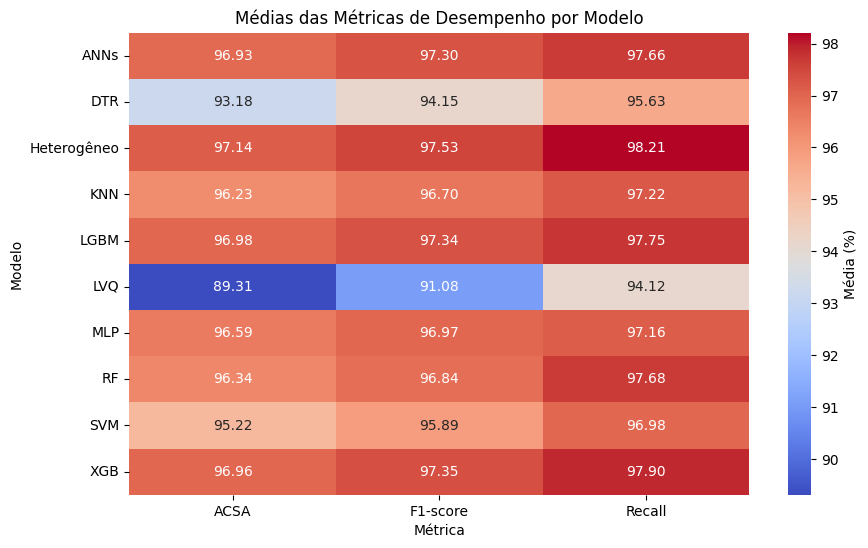

In [7]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'F1-score'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

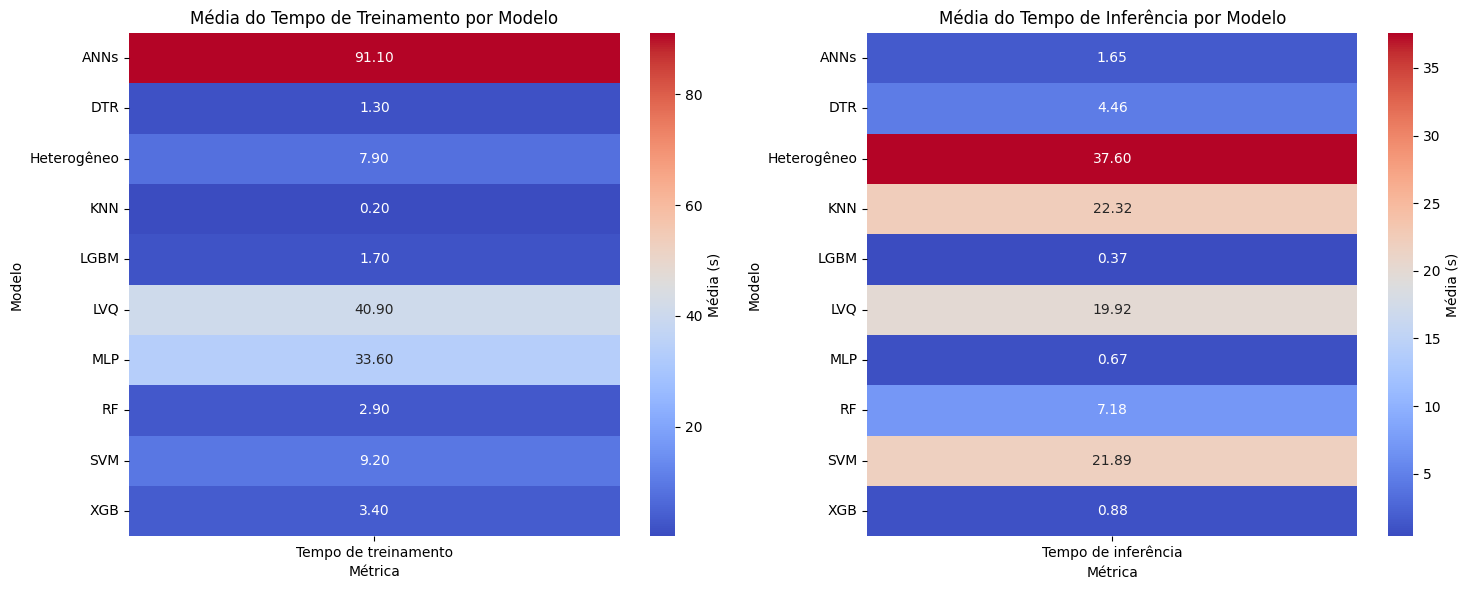

In [8]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [9]:
friedman_results

,metric,statistic,p-value,are_different
0,ACSA,75.047330,1.546656e-12,True
1,recall,57.837905,3.491531e-09,True
2,f1_score,72.786408,4.316741e-12,True
3,training_time,88.930909,2.667339e-15,True
4,inference_time,84.798666,1.789704e-14,True


In [10]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,ACSA,KNN vs LVQ,2.824268e-01,False
1,ACSA,KNN vs DTR,7.751850e-01,False
2,ACSA,KNN vs SVM,9.989075e-01,False
3,ACSA,KNN vs RF,9.999316e-01,False
4,ACSA,KNN vs XGB,1.605635e-01,False
...,...,...,...,...
220,inference_time,LGBM vs Heterogêneo,4.973169e-08,True
221,inference_time,LGBM vs ANNs,8.544355e-01,False
222,inference_time,MLP vs Heterogêneo,5.789859e-07,True
223,inference_time,MLP vs ANNs,9.752367e-01,False


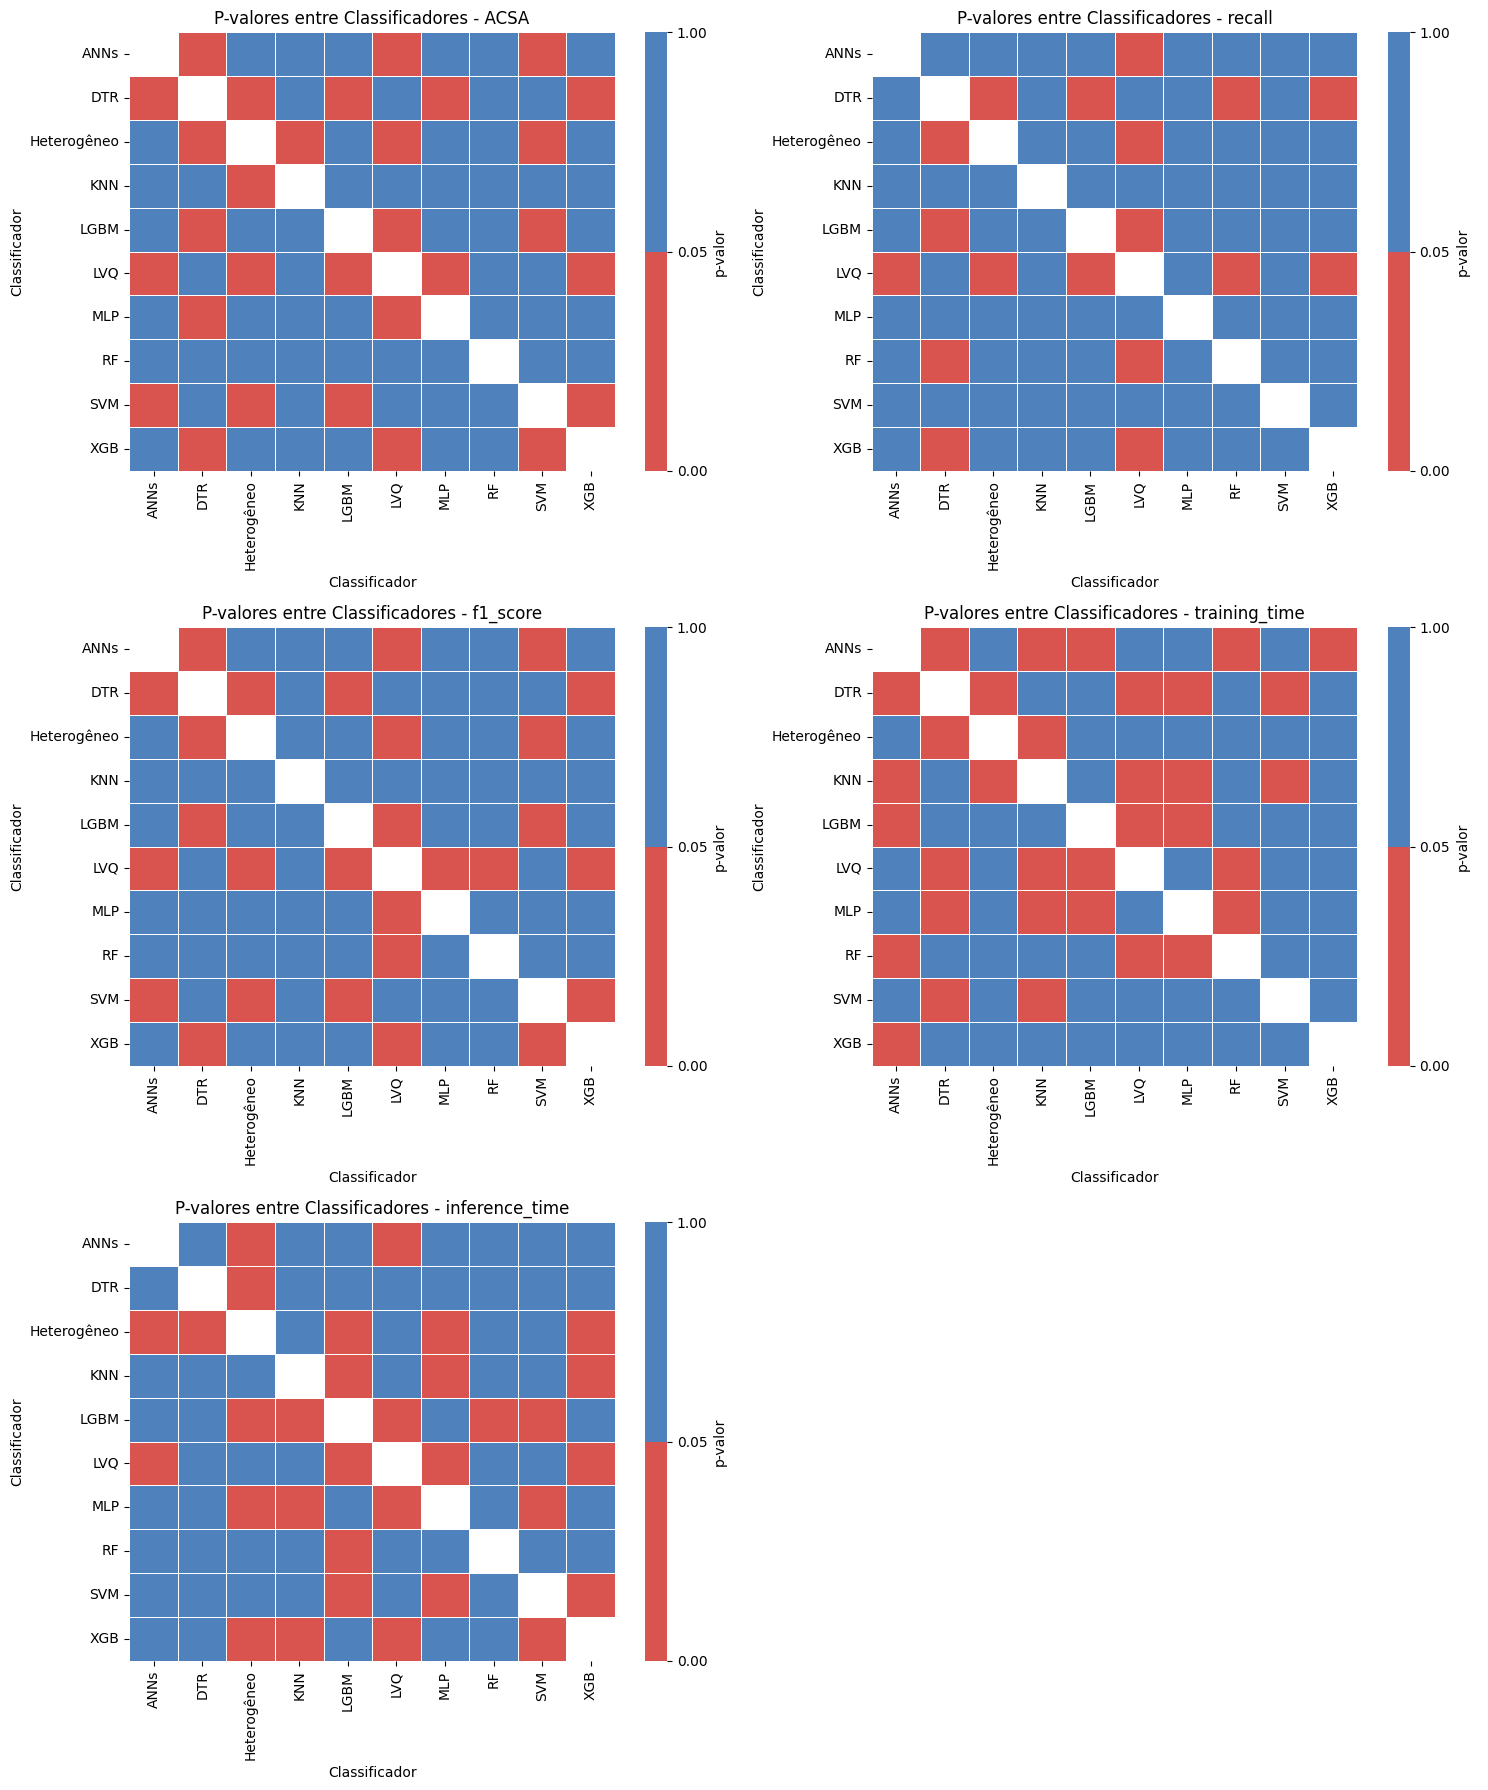

In [20]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric}")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


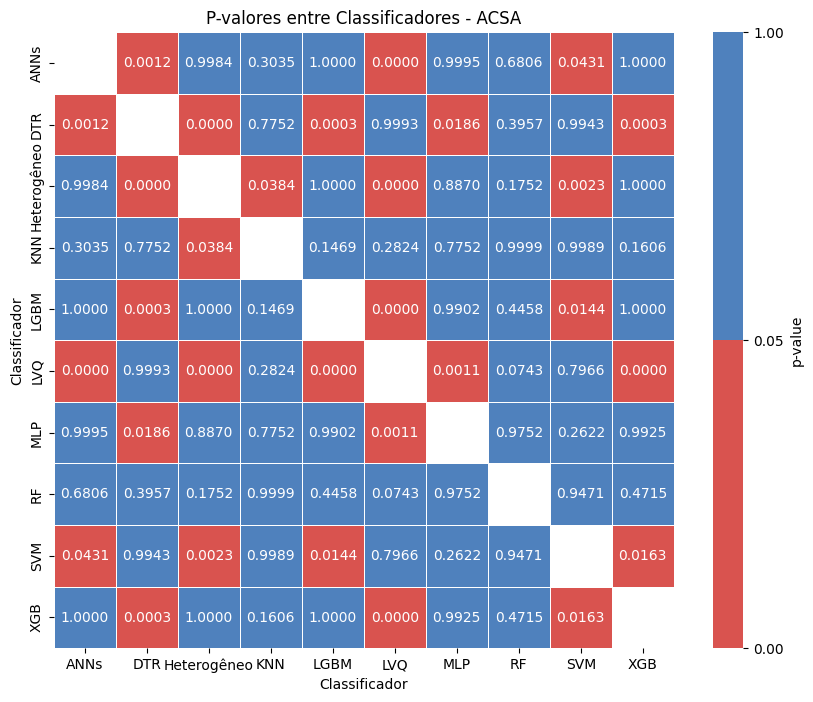

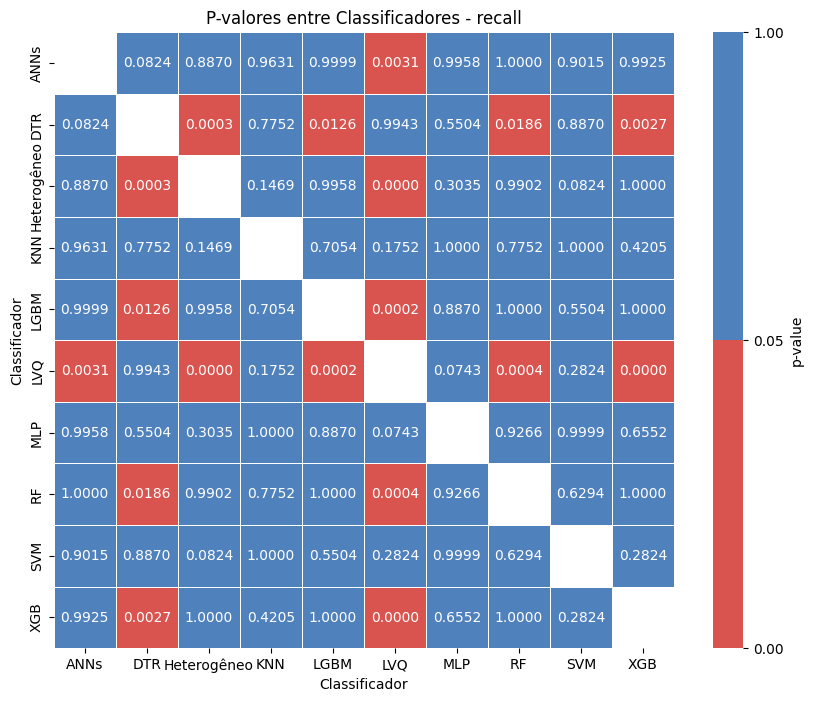

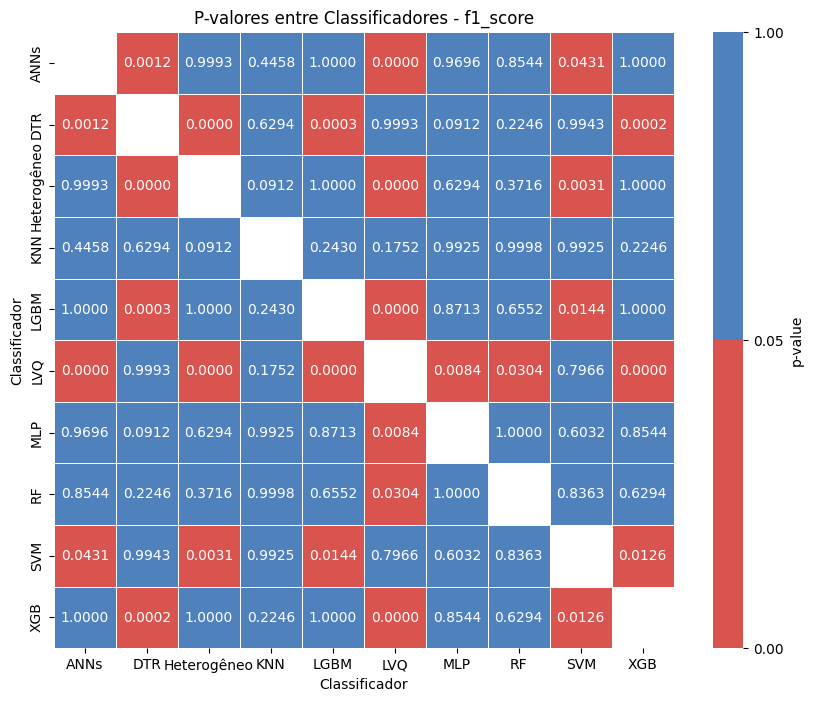

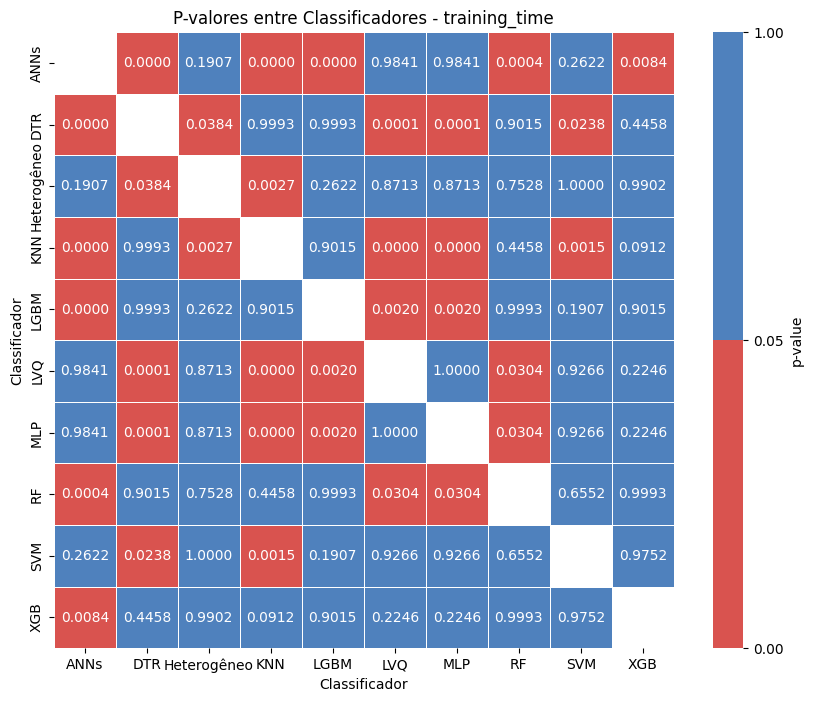

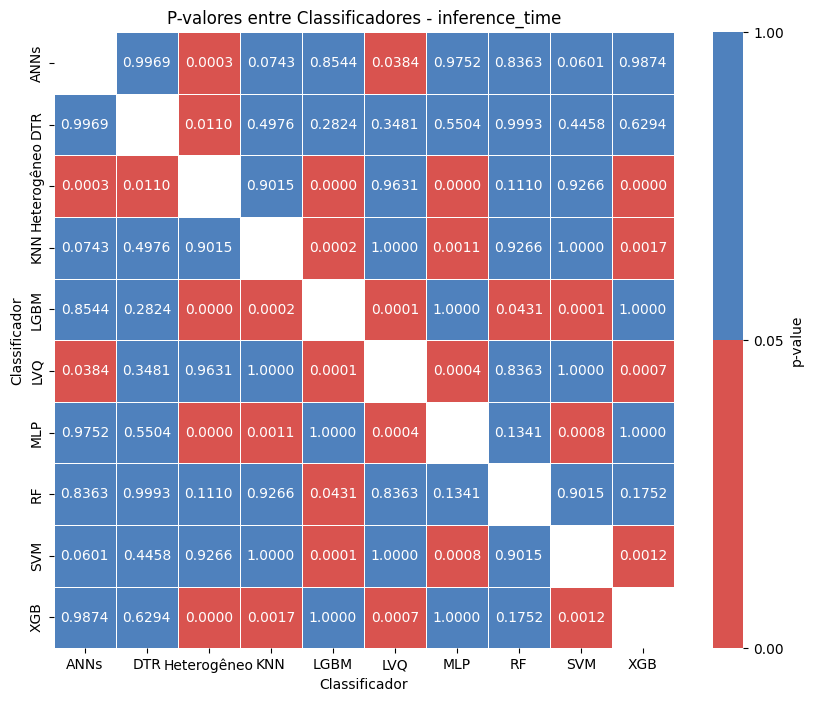

In [11]:
nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

for metric in nemenyi_results['metric'].unique():
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    
    # Criar a tabela pivô para os p-valores
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value")
    pivot_table = pivot_table.combine_first(pivot_table.T)
    
    # Configurar o mapa de cores baseado no threshold
    cmap = mcolors.ListedColormap(["#D9534F", "#4F81BD"])  # Vermelho e azul
    bounds = [0, 0.05, 1]  # Limites para o threshold
    norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalização para as cores

    # Criar o mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".4f",
        cmap=cmap,
        norm=norm,
        linewidths=0.5,
        cbar_kws={'label': 'p-value'},
        annot_kws={'color': 'white', 'fontsize': 10}
    )

    # Títulos e rótulos
    plt.title(f"P-valores entre Classificadores - {metric}")
    plt.xlabel("Classificador")
    plt.ylabel("Classificador")
    plt.show()

In [71]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
7,ACSA,KNN vs Heterogêneo,3.839448e-02,True,KNN,Heterogêneo
12,ACSA,LVQ vs XGB,8.519650e-06,True,LVQ,XGB
13,ACSA,LVQ vs LGBM,6.985095e-06,True,LVQ,LGBM
14,ACSA,LVQ vs MLP,1.062395e-03,True,LVQ,MLP
15,ACSA,LVQ vs Heterogêneo,4.663298e-07,True,LVQ,Heterogêneo
...,...,...,...,...,...,...
211,inference_time,RF vs LGBM,4.306208e-02,True,RF,LGBM
217,inference_time,XGB vs Heterogêneo,1.099139e-06,True,XGB,Heterogêneo
220,inference_time,LGBM vs Heterogêneo,4.973169e-08,True,LGBM,Heterogêneo
222,inference_time,MLP vs Heterogêneo,5.789859e-07,True,MLP,Heterogêneo


# Com ADASYN

In [ ]:
best_pipelines, ensembles = models_to_cv()

metrics = {}
for model in best_pipelines.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_ADASYN_cv.csv')

for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics/metrics_{model}_ADASYN_cv.csv')

In [ ]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['ACSA', 'recall', 'f1_score', 'training_time', 'inference_time']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [ ]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,ACSA,0.962301,0.005026,"0.9592, 0.9654"
1,KNN,recall,0.972244,0.006639,"0.9681, 0.9764"
2,KNN,f1_score,0.966959,0.004539,"0.9641, 0.9698"
3,KNN,training_time,0.166842,0.033929,"0.1458, 0.1879"
4,KNN,inference_time,0.223223,0.020070,"0.2108, 0.2357"
5,LVQ,ACSA,0.893086,0.013551,"0.8847, 0.9015"
6,LVQ,recall,0.941213,0.010278,"0.9348, 0.9476"
7,LVQ,f1_score,0.910768,0.009343,"0.9050, 0.9166"
8,LVQ,training_time,40.881521,21.170678,"27.7598, 54.0032"
9,LVQ,inference_time,0.199170,0.102838,"0.1354, 0.2629"


In [ ]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,ACSA,96.23,0.50,"[95.92 , 96.54]"
1,KNN,Recall,97.22,0.66,"[96.81 , 97.64]"
2,KNN,F1-score,96.70,0.45,"[96.41 , 96.98]"
3,KNN,Tempo de treinamento,0.20,0.00,"[14.58 , 18.79]"
4,KNN,Tempo de inferência,22.32,2.01,"[21.08 , 23.57]"
5,LVQ,ACSA,89.31,1.36,"[88.47 , 90.15]"
6,LVQ,Recall,94.12,1.03,"[93.48 , 94.76]"
7,LVQ,F1-score,91.08,0.93,"[90.50 , 91.66]"
8,LVQ,Tempo de treinamento,40.90,21.20,"[2775.98 , 5400.32]"
9,LVQ,Tempo de inferência,19.92,10.28,"[13.54 , 26.29]"


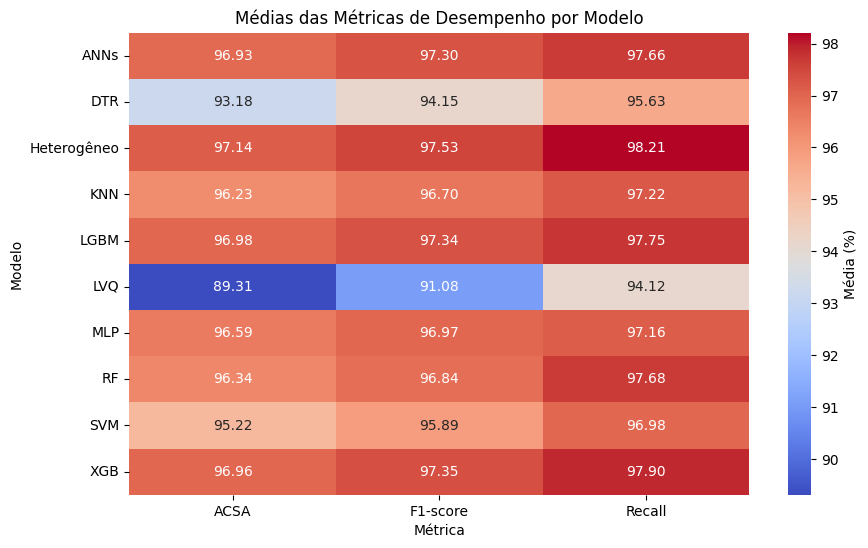

In [ ]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall', 'F1-score'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo - ADASYN")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

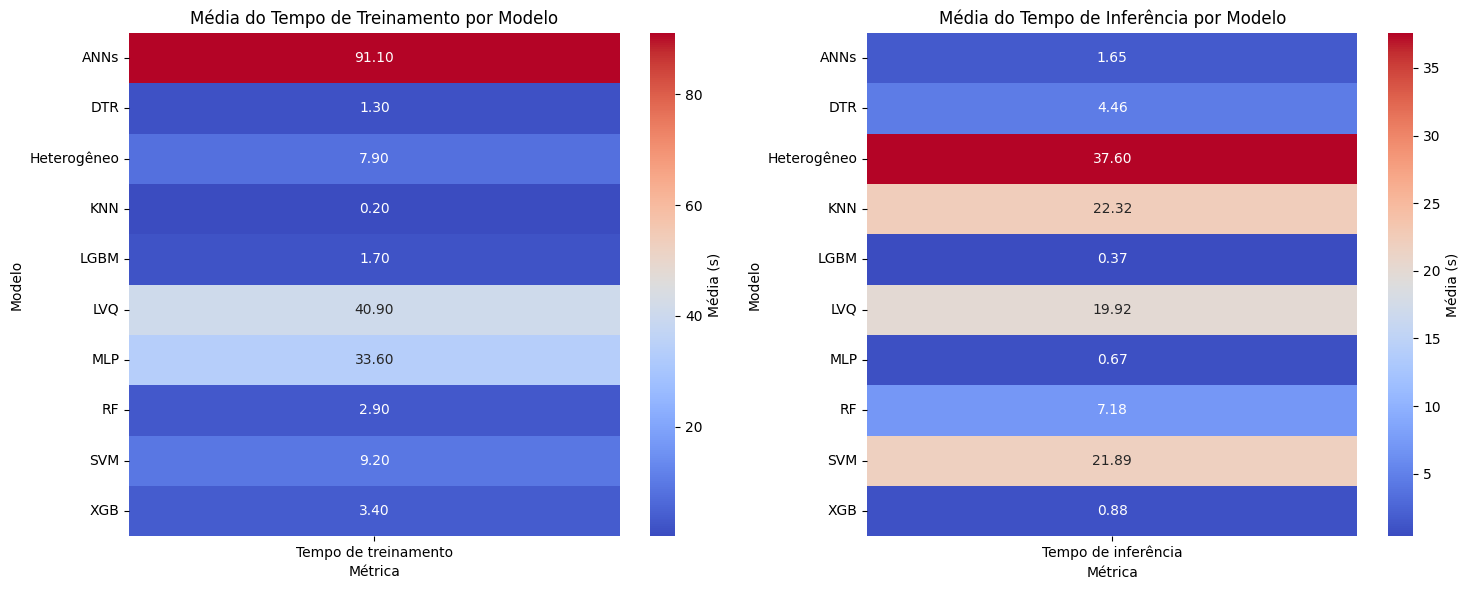

In [ ]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo - ADASYN")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo - ADASYN")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [ ]:
friedman_results

,metric,statistic,p-value,are_different
0,ACSA,75.047330,1.546656e-12,True
1,recall,57.837905,3.491531e-09,True
2,f1_score,72.786408,4.316741e-12,True
3,training_time,88.930909,2.667339e-15,True
4,inference_time,84.798666,1.789704e-14,True


In [ ]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,ACSA,KNN vs LVQ,2.824268e-01,False
1,ACSA,KNN vs DTR,7.751850e-01,False
2,ACSA,KNN vs SVM,9.989075e-01,False
3,ACSA,KNN vs RF,9.999316e-01,False
4,ACSA,KNN vs XGB,1.605635e-01,False
...,...,...,...,...
220,inference_time,LGBM vs Heterogêneo,4.973169e-08,True
221,inference_time,LGBM vs ANNs,8.544355e-01,False
222,inference_time,MLP vs Heterogêneo,5.789859e-07,True
223,inference_time,MLP vs ANNs,9.752367e-01,False


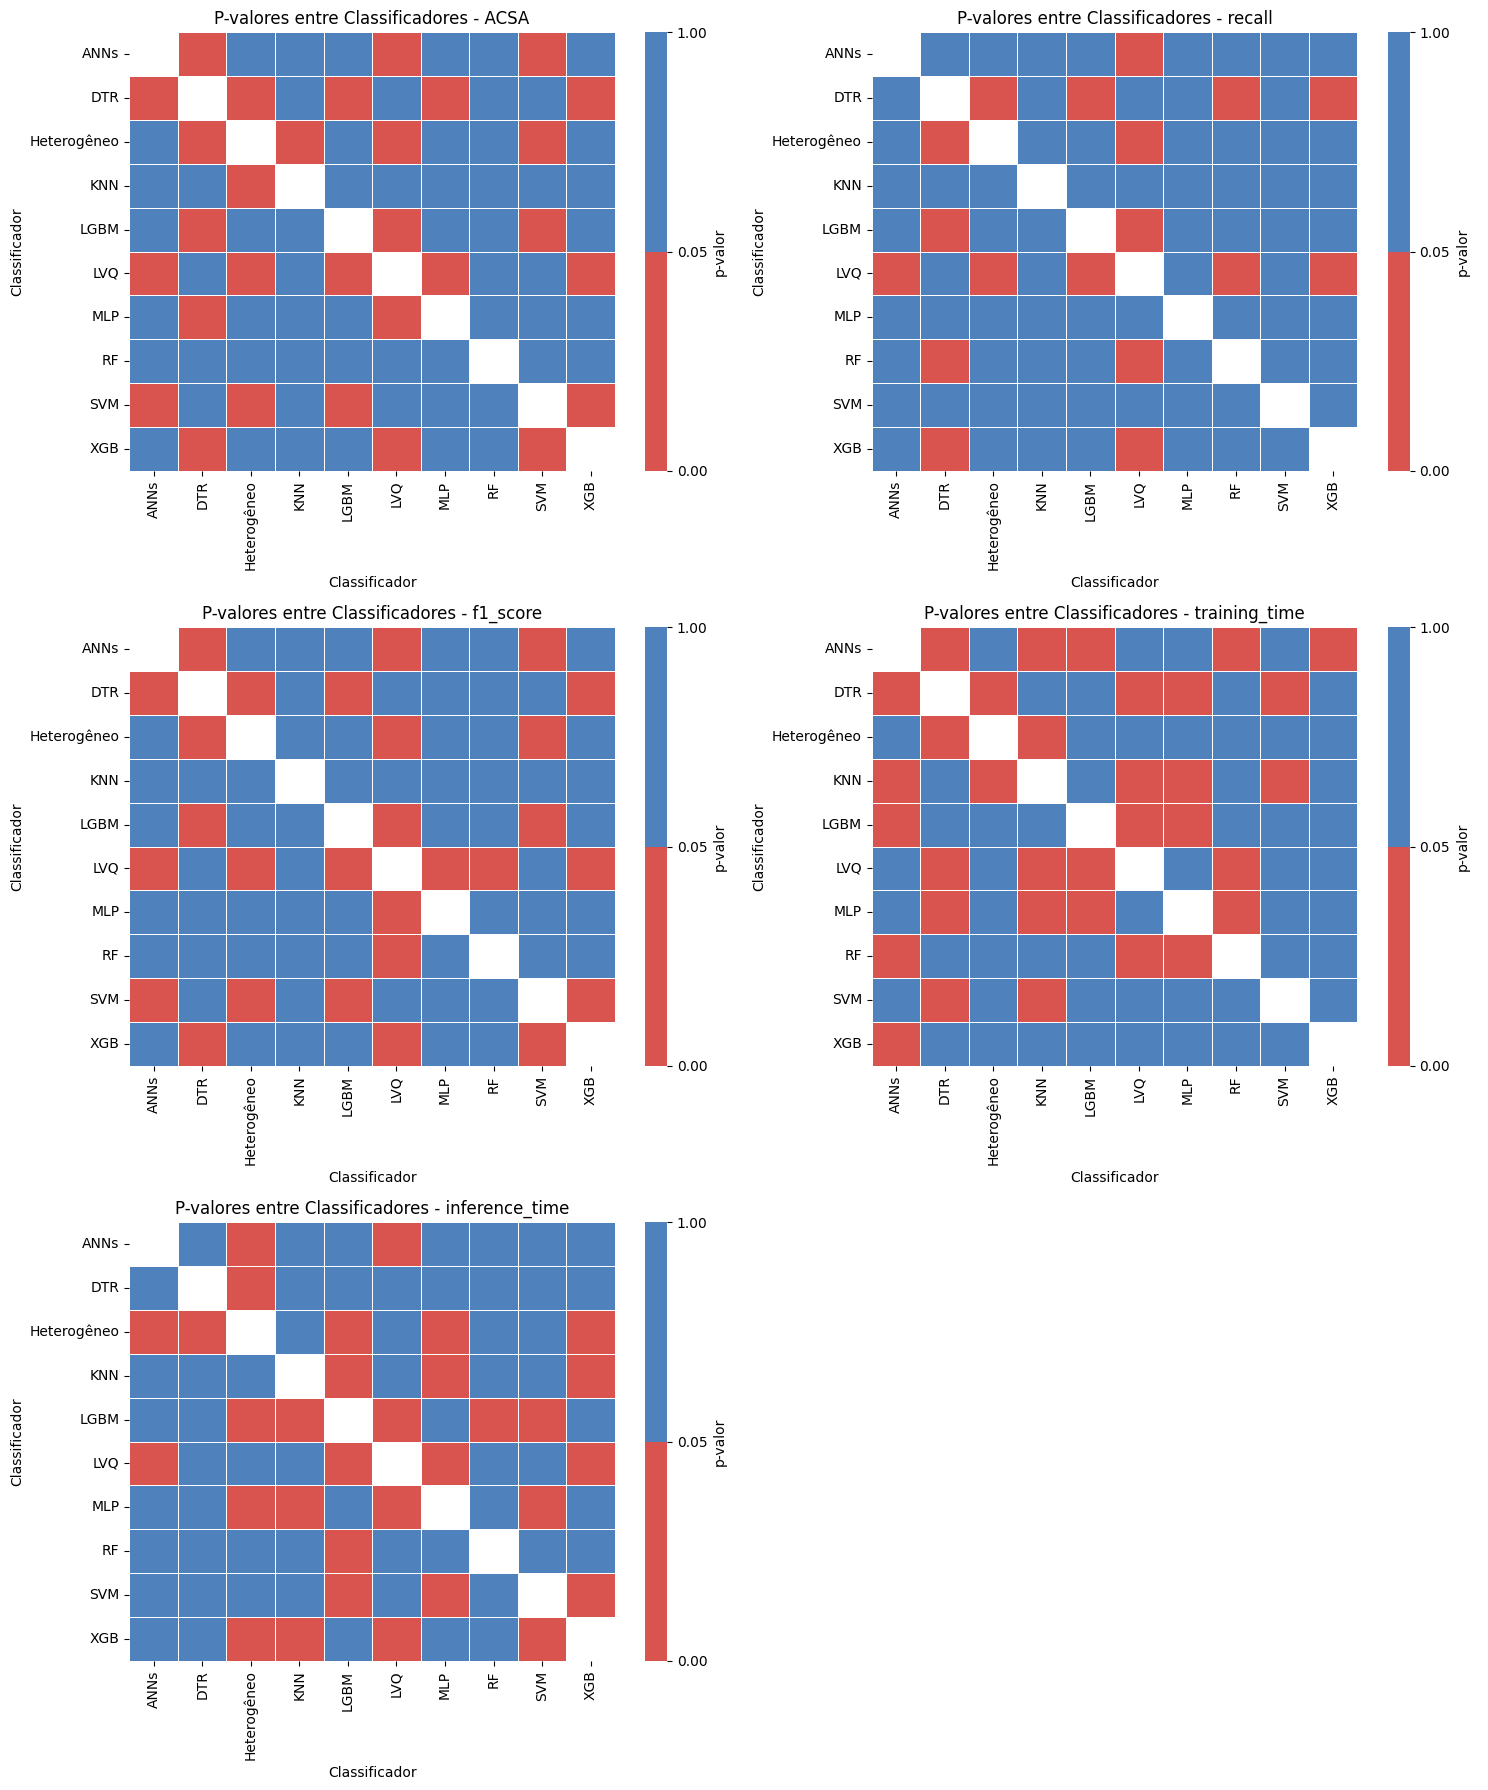

In [ ]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric} - ADASYN")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
7,ACSA,KNN vs Heterogêneo,3.839448e-02,True,KNN,Heterogêneo
12,ACSA,LVQ vs XGB,8.519650e-06,True,LVQ,XGB
13,ACSA,LVQ vs LGBM,6.985095e-06,True,LVQ,LGBM
14,ACSA,LVQ vs MLP,1.062395e-03,True,LVQ,MLP
15,ACSA,LVQ vs Heterogêneo,4.663298e-07,True,LVQ,Heterogêneo
...,...,...,...,...,...,...
211,inference_time,RF vs LGBM,4.306208e-02,True,RF,LGBM
217,inference_time,XGB vs Heterogêneo,1.099139e-06,True,XGB,Heterogêneo
220,inference_time,LGBM vs Heterogêneo,4.973169e-08,True,LGBM,Heterogêneo
222,inference_time,MLP vs Heterogêneo,5.789859e-07,True,MLP,Heterogêneo
